<center><h1> Formation en Machine Learning et Deep Learning</h1></center>
<center><h3> Atelier2 : comprendre la Classification non-Supervisée </h3>
</center>

**Objectif** : Initier les apprenants à la classification non-supervisée. Nous allons utiliser 3 principaux algorithmes à savoir :

*   K-Means : clustering partitionnel
*   DBSCAN : clustering basé sur la densité
*   Clustering hiérarchique : approche agglomérative
*   Modèle de Mélange de Gaussiennes (GMM - Gaussian Mixture Model)

<h1> Introduction </h1>
La classification non supervisée est une branche du machine learning où l’objectif est d’analyser et de structurer des données sans labels préalablement définis. Contrairement à la classification supervisée, où les données d’apprentissage contiennent des étiquettes pour guider l’algorithme, la classification non supervisée se base uniquement sur les similarités et les motifs présents dans les données pour regrouper des observations.

Dans cet atelier, nous allons explorer les méthodes de clustering qui sont parmi les plus utilisées en classification non supervisée.

Bibliothèques :
*   Scikit-learn : Bibliothèque puissante pour l’apprentissage automatique.
*   Matplotlib et Seaborn : Outils pour la visualisation des données.

In [ ]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # pour la visualisation
import seaborn as sns # pour la visualisation

<H2> Chargement du dataset</h2>
Nous allons utiliser le dataset IRIS. Il est à noter que le dataset IRIS est un dataset qui peut être utilisé à la fois pour la classification supervisée et pour la classification non-supervisée. Pour notre atelier de clustering, nous allons utiliser seulement les caractéristiques sans étiquettes.

Le dataset Iris contient 150 observations de fleurs appartenant à trois espèces différentes. Chaque fleur est décrite à l’aide de 4 variables numériques mesurant des dimensions de la fleur :

*   Sepal length (longueur du sépale, en cm)
*   Sepal width (largeur du sépale, en cm)
*   Petal length (longueur du pétale, en cm)
*   Petal width (largeur du pétale, en cm)

In [ ]:
# Chargement du dataset Iris
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Affichage des premières lignes
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<H2> Visualisation des données </H2>
Nous allons visualiser les données de seulement les deux premières caractéristiques : sepal length (cm) et sepal width (cm)

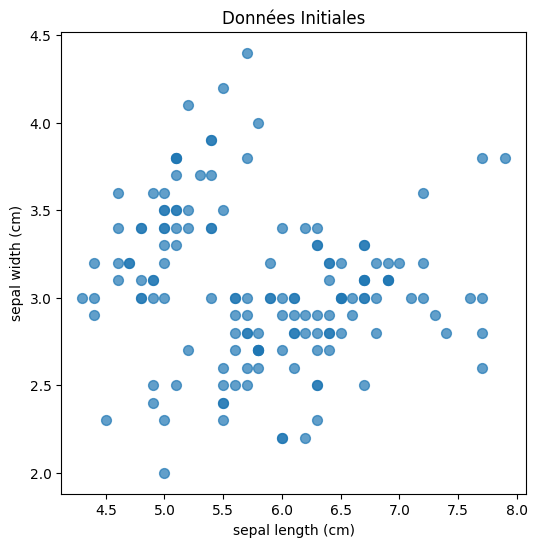

In [ ]:
# Visualisation initiale
def plot_initial_data():
    plt.figure(figsize=(6,6))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=50, alpha=0.7)
    plt.title('Données Initiales')
    plt.xlabel(dataset.feature_names[0])
    plt.ylabel(dataset.feature_names[1])
    plt.show()
plot_initial_data()

<h2>K-Means</h2>
Nous allons appliquer le K-Means, qui est un algorithme basé sur le Partitionnement, pour segmenter les fleurs en 2 clusters utilisant les 4 caractèristiques (Features)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=2,       # Nombre de clusters (groupes) à former
    init='random',      # Méthode d'initialisation des centres ('random' ou 'k-means++')
    max_iter=100,       # Nombre maximal d'itérations pour chaque exécution de K-Means
    random_state=42,    # Fixe une graine pour reproductibilité des résultats
)

kmeans_labels = kmeans.fit_predict(df)

**Visualisation des résultas**

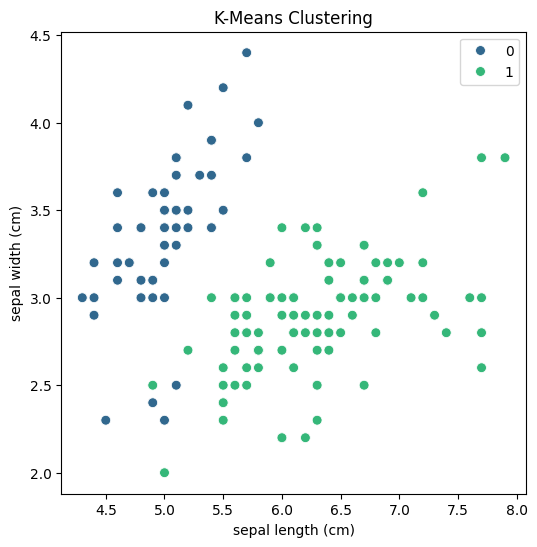

In [ ]:
def plot_clusters(labels, title):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=labels, palette='viridis', s=50)
    plt.title(title)
    plt.xlabel(dataset.feature_names[0])
    plt.ylabel(dataset.feature_names[1])
    plt.show()

plot_clusters(kmeans_labels, "K-Means Clustering")


On remarque que le résultat de séparation avec K-Means n'est pas à 100% correct mais reste acceptable.

**Choisir le nombre optimal de clusters :**

On peut utiliser la méthode du coude (Elbow Method) :

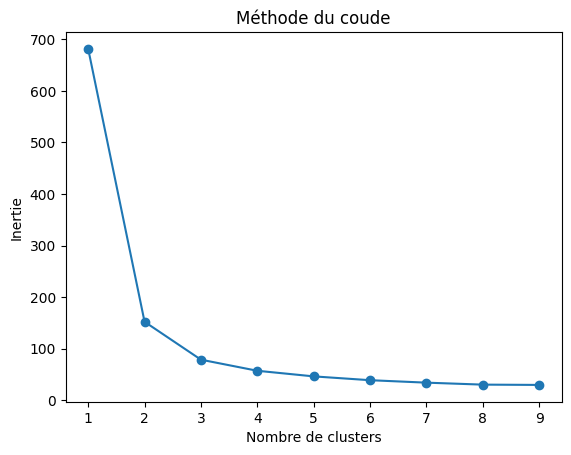

In [ ]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Méthode du coude")
plt.show()


In [ ]:
Il faut noter que L’inertie mesure la compacité des clusters.
Le «coude» du graphique indique un bon compromis. pour notre exemple, le nombre optimal de clusters est 2

<h2>DBSCAN</h2>
Par la suite, nous allons utiliser l'algorithme DBSCAN (Density-Based Spatial Clustering of Applications with Noise) qui est algorithme basé sur la densité

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.5,            # Distance maximale entre deux points voisins
    min_samples=5,      # Nombre minimal de points pour former un cluster
    metric='euclidean', # Distance utilisée ('euclidean', 'manhattan', etc.)
)

dbscan_labels = dbscan.fit_predict(df)

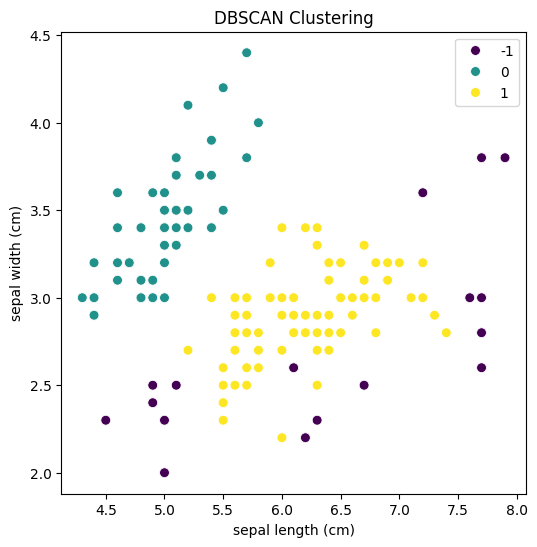

In [ ]:
# Afficher le resultat
plot_clusters(dbscan_labels, "DBSCAN Clustering")

On peut remarquer d'après les résultats que le DBSCAN identifie les zones de forte densité et rejette les points isolés comme du bruit. Contrairement à K-Means, il ne nécessite pas de spécifier un nombre de clusters à l'avance.

La performance de DBSCAN dépend du choix des paramètres eps et min_samples.
Dans ce cas, il a bien séparé une espèce, mais a marqué certains points comme du bruit.

<H2> Clustering agglomératif </H2>
Le Clustering Agglomératif est une méthode de clustering hiérarchique qui regroupe progressivement les points de données en formant une hiérarchie de clusters.

Le résultat est souvent visualisé à l’aide d’un dendrogramme, qui montre la hiérarchie des regroupements.

Le dendrogramme aide à choisir le nombre de clusters en observant les grandes coupures.

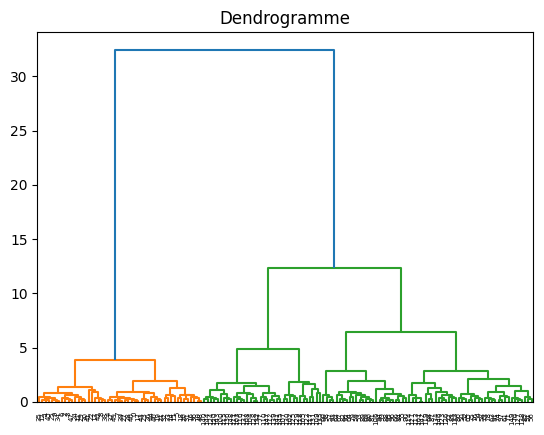

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(df, method='ward')
dendrogram(linked)
plt.title("Dendrogramme")
plt.show()

Le dendrogramme nous indique qu'il y a 2 clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(
    metric='euclidean',  # Mesure de distance utilisée (ex: 'euclidean', 'manhattan', 'cosine')
    linkage='ward',      # Méthode de fusion : 'ward', 'complete', 'average', 'single'
)

agglo_labels = agglo.fit_predict(df)

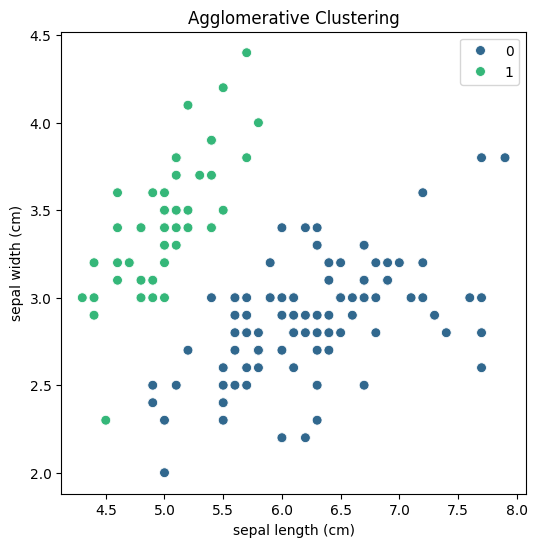

In [ ]:
# Afficher le resultat
plot_clusters(agglo_labels, "Agglomerative Clustering")

On remarque que le clustering Agglomératif a permi une séparation nette pour un des clusters, mais certains points de l'autre cluster montrent un certain chevauchement.

Contrairement à K-Means, il ne dépend pas d'une initialisation aléatoire, ce qui garantit une stabilité des résultats.

Remarque: Il est possible de définir le nombre de clusers à extraire utilisant le paramètre n_clusters=2


<H2> Modèle de Mélange de Gaussiennes (GMM - Gaussian Mixture Model) </H2>
Le Modèle de Mélange de Gaussiennes (GMM) est une technique de clustering probabiliste qui modélise les données comme un mélange de plusieurs distributions gaussiennes (normales).

Contrairement à K-Means, où chaque point appartient strictement à un cluster, GMM attribue à chaque point une probabilité d'appartenance à chaque cluster.

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=2,         # Nombre de clusters (composantes gaussiennes)
    covariance_type='full', # Type de matrice de covariance ('full', 'tied', 'diag', 'spherical')
    max_iter=100,          # Nombre maximal d'itérations
    n_init=1,              # Nombre d'initialisations différentes pour éviter les minima locaux
    random_state=42,       # Fixer une graine pour reproductibilité
)
gmm_labels = gmm.fit_predict(df)

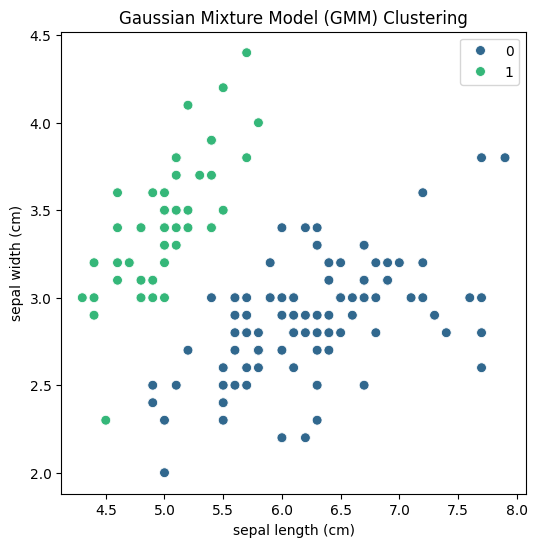

In [ ]:
# Afficher le resultat
plot_clusters(gmm_labels, "Gaussian Mixture Model (GMM) Clustering")

On peut remarquer que  les groupes sont similaires à ceux obtenus par Agglomerative Clustering, ce qui peut indiquer une structure sous-jacente similaire.



<H2> Etude comparative </h2>
Pour une étude comparative, nous allons utiliser l'indice de Silhouette qui permet d'évaluer la qualité du clustering en mesurant à quel point les points sont bien assignés à leurs clusters.

Plus le score est proche de 1, meilleure est la séparation des clusters.



In [ ]:
from sklearn.metrics import silhouette_score

# --- Évaluation des Clusters ---
def evaluate_clusters(labels, method):
    score = silhouette_score(df, labels)
    print(f"Silhouette Score ({method}): {score:.2f}")


evaluate_clusters(kmeans_labels, "K-Means")
evaluate_clusters(dbscan_labels, "DBSCAN")
evaluate_clusters(agglo_labels, "Agglomerative Clustering")
evaluate_clusters(gmm_labels, "GMM")

Silhouette Score (K-Means): 0.68
Silhouette Score (DBSCAN): 0.49
Silhouette Score (Agglomerative Clustering): 0.69
Silhouette Score (GMM): 0.69


Les résultats nous montrent que L'Agglomerative Clustering, GMM et K-Means ont les meilleurs scores, indiquant une bonne séparation des clusters.

Le DBSCAN a un score plus faible (0.49), ce qui peut être dû à un mauvais choix des paramètres et qui nécessitent d’être optimisés.

<H1> Clustering (Segmentation) d'images </h1>
La segmentation d'images est une technique en vision par ordinateur qui consiste à diviser une image en plusieurs régions homogènes.  En fonction de caractéristiques visuelles comme la couleur, la texture ou la forme.
L'objectif est de :

*   Identifier les différentes régions d'intérêt dans une image
*   Séparer les objets du fond
*   Faciliter l’analyse et l'interprétation des images

**Segmentation basée sur le clustering:**

La segmentation basée sur le clustering est le Regroupement des pixels similaires à l'aide d’algorithmes de Machine Learning comme K-Means, DBSCAN ou autres. Biensûr, puisque c'est une classification non supérvisée, aucune étiquette ni supervision n’est nécessaire.

En segmentation d’images, nous pouvons appliquer le clustering de deux manières principales :

1.   Clustering utilisant les intensités des pixels (segmentation directe par couleur ou intensité)
2.   Clustering utilisant les features des pixels (segmentation basée sur des caractéristiques avancées)


<H2> Clustering basé sur les intensités des pixels</h2>
Une image est une matrice de pixels qui représente une scène visuelle:

*  Une image en niveaux de gris (grayscale image) est une image où chaque pixel est représenté par une seule valeur d'intensité lumineuse, allant du noir (0) au blanc (255).
*  Une image en couleur une image où chaque pixel est représenté par plusieurs valeurs correspondant aux composantes de couleur. Une image RGB, utilise trois canaux (rouge, vert, bleu). C'est à dire une matrice de 3 dimensions.

<h3>Chargement et Prétraitement de l'Image</h3>

**Bibliothèques utilisées:**


*   cv2 (OpenCV - Open Source Computer Vision Library): Elle permet le Chargement et manipulation des images, la conversion des images en différents espaces de couleurs (RGB, niveaux de gris), le traitement et transformation d’images (extraction de régions, filtrage, etc.), ...



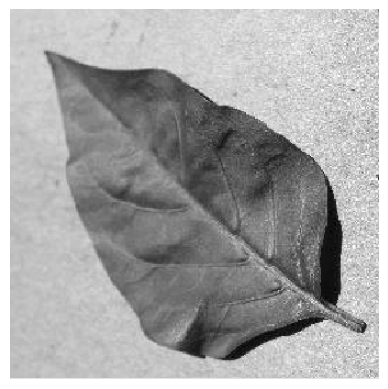

In [ ]:
import numpy as np

import cv2
import matplotlib.pyplot as plt

# Charger une image depuis une URL ou Google Drive
image_path = '/content/Feuille.bmp'
# Chargement de l'image
image = cv2.imread(image_path)
# Conversion en niveaux de gris
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(image_gray, cmap="gray")
plt.axis('off')
plt.show()

<h2> Segmentation avec K-Means </>
<h3> Segmentation d'une image à niveau de gris</h3

L'objectif est de faire le clustering de chaque pixel. Alors, il faut transformer l'image qui est sous forme matricielle en un vecteur de pixels en un vecteur de pixel.

In [ ]:
print(f"Taille de l'image 2D : {image_gray.shape}")
pixels = image_gray.reshape((-1, 1))  # Mise en forme en (nb_pixels, 1)
print(f'Taille du vecteur de pixels: {pixels.shape}')

Taille de l'image 2D : (337, 336)
Taille du vecteur de pixels: (113232, 1)


Nous allons procéder à un clustering en 2 clusters (Objet et le fond)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

# Appliquer le K-Means sur les pixels
labels = kmeans.fit_predict(pixels)

# Afficher la taille de la sorite
print(f'Taille de la sortie de K-Means: {labels.shape}')

Taille de la sortie de K-Means: (113232,)


In [ ]:
# Reconstruire l'image aprés clustering (segmentation)
segmented_image = labels.reshape(image_gray.shape)

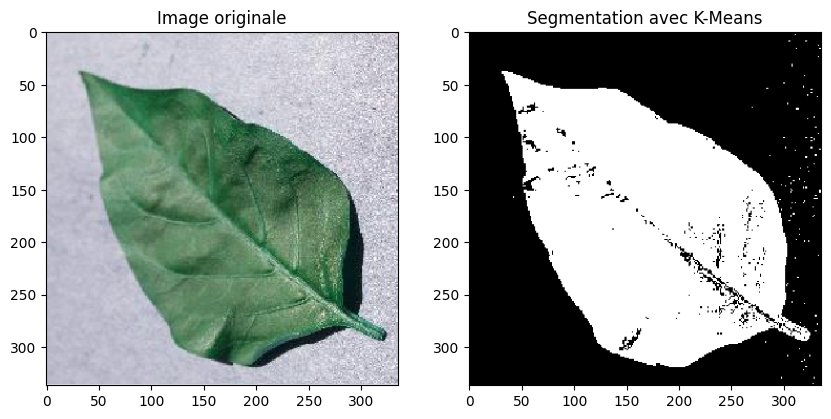

In [ ]:
# Convertir l'image segmentée en image binaire
binary_image = np.uint8(segmented_image == 0)*255   # Classe 1 en blanc, autres en noir

# Afficher les résultats
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image originale")

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Segmentation avec K-Means')

plt.show()

On peut remarquer que le résultat de la segmentation avec K-Means n'est pas excellent mais acceptable.

<H3> Segmentation de l'image couleur </h3>
Nous allons travailler dans l'espace de douleur RGB

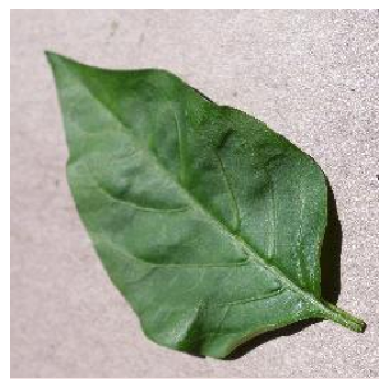

In [ ]:
# Conversion en niveaux de gris
image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
print(f"Taille de l'image 2D : {image_rgb.shape}")
pixels_rgb = image.reshape((-1, 3))  # Mise en forme en (nb_pixels, 3)
print(f'Taille du vecteur de pixels: {pixels_rgb.shape}')

Taille de l'image 2D : (337, 336, 3)
Taille du vecteur de pixels: (113232, 3)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
# Appliquer le K-Means sur les pixels
labels = kmeans.fit_predict(pixels_rgb)
# Afficher la taille de la sorite
print(f'Taille de la sortie de K-Means: {labels.shape}')

Taille de la sortie de K-Means: (113232,)


In [ ]:
# Reconstruire l'image aprés clustering (segmentation)
segmented_image_rgb = labels.reshape(image_gray.shape)

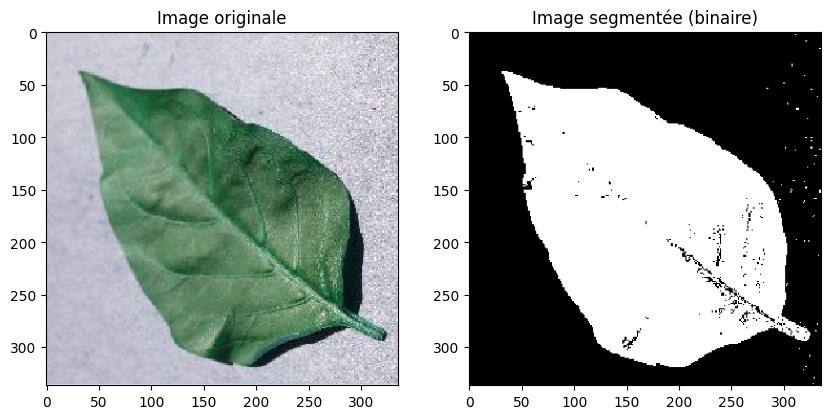

In [ ]:
# Convertir l'image segmentée en image binaire
binary_image = np.uint8(segmented_image_rgb == 0)*255   # Classe 1 en blanc, autres en noir

# Afficher les résultats
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image originale")

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap="gray")
plt.title("Image segmentée (binaire)")

plt.show()

On peut remarquer que les résultats utilisant les intensités dans l'espace de couleur RGB sont presque les mêmes que les résultats utilisant l'image à niveau de gris

<H3> Segmentation de chaque canal R, G et B séparément </H2>
Dans cette partie, nous allons procéder à la segmentation des 3 canaux R, G et B séparément et après reconstruire l'image segmentée couleur.

In [ ]:
# Récupération des canaux R, G et B
R, G, B = cv2.split(image)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
# Segmentation des 3 canaux
pixelsR=R.reshape(-1,1)
pixelsG=G.reshape(-1,1)
pixelsB=B.reshape(-1,1)

# Appliquer le K-Means sur les pixels de R
labelsR = kmeans.fit_predict(pixelsR)

# Appliquer le K-Means sur les pixels de G
labelsG = kmeans.fit_predict(pixelsG)

# Appliquer le K-Means sur les pixels de B
labelsB = kmeans.fit_predict(pixelsB)


# Remappage des labels en valeurs 0 et 255 pour une image binaire
segmented_imageR = (labelsR.reshape(R.shape) * 255).astype(np.uint8)
segmented_imageG = (labelsG.reshape(G.shape) * 255).astype(np.uint8)
segmented_imageB = (labelsB.reshape(B.shape) * 255).astype(np.uint8)


# Fusion des canaux pour reconstruire l'image segmentée couleur
segmented_imageRGB=cv2.merge([segmented_imageR, segmented_imageG, segmented_imageB])

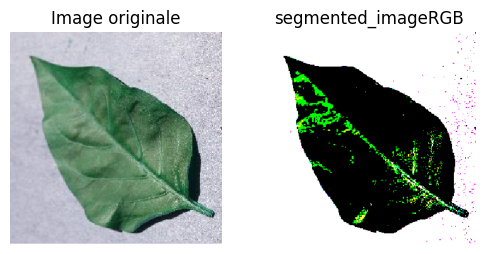

In [ ]:
# Affichage des images
plt.figure(figsize=(6, 12))



plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_imageRGB)
plt.title("segmented_imageRGB")
plt.axis("off")


plt.show()